In [3]:
#Standard libraries for data analysis:
import numpy as np
import pandas as pd
pd.options.display.max_columns = None
pd.options.display.max_rows = None
from scipy import stats
from scipy.stats import skew, norm
import statsmodels.api as sm
import joblib
import pickle

# Modules for data preprocessing:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler, SMOTE
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix

#Modules for Model Selection:
from sklearn import svm, tree, linear_model, neighbors
from sklearn import naive_bayes, ensemble, discriminant_analysis, gaussian_process
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import PCA
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier, GradientBoostingClassifier

#Modules for Model Evaluation & Improvement:
from sklearn.metrics import confusion_matrix, accuracy_score 
from sklearn.metrics import f1_score, precision_score, recall_score, fbeta_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics
from sklearn.metrics import classification_report, precision_recall_curve
from sklearn.metrics import auc, roc_auc_score, roc_curve
from sklearn.metrics import make_scorer, recall_score, log_loss
from sklearn.metrics import average_precision_score

#Standard libraries for data visualization:
import seaborn as sns
from matplotlib import pyplot
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import matplotlib 
%matplotlib inline
color = sns.color_palette()
from IPython.display import display
import plotly.offline as py
py.init_notebook_mode(connected=True)
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objects as go
import plotly.express as px
import plotly.tools as tls
import plotly.figure_factory as ff

import warnings
warnings.filterwarnings('ignore')

# 9.1: Load in the data.
- The target column should be considered as whether a patient will develop heart disease or not.

In [4]:
from google.colab import files
uploaded = files.upload()

Saving heart.csv to heart.csv


In [5]:
heart = pd.read_csv('heart.csv', encoding='Latin-1')
display(heart.head(), heart.tail())

,ï»¿age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


,ï»¿age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [6]:
heart.rename(columns={'ï»¿age': 'age'}, inplace=True) 

1. age : age in years
2. sex : (1 = male; 0 = female)
3. cp : chest pain type
4. trestbps : resting blood pressure (in mm Hg on admission to the hospital)
5. chol : serum cholestoral in mg/dl
6. fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
7. restecg : resting electrocardiographic results
8. thalach : maximum heart rate achieved
9. exang : exercise induced angina (1 = yes; 0 = no)
10. oldpeak : ST depression induced by exercise relative to rest
11. slope : the slope of the peak exercise ST segment
12. ca : number of major vessels (0–3) colored by flourosopy
13. thal : 1 = normal; 2 = fixed defect; 3 = reversable defect
14. target : 1 = disease; 0 = no disease

# 9.2: Explore the data. 
- Notice all columns are numerical. Therefore separate the continuous from the discrete features.

In [7]:
print(f'There are {heart.shape[0]} rows and {heart.shape[1]} columns')

There are 303 rows and 14 columns


In [8]:
display(heart.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


None

In [9]:
display(heart.isnull().any())

age         False
sex         False
cp          False
trestbps    False
chol        False
fbs         False
restecg     False
thalach     False
exang       False
oldpeak     False
slope       False
ca          False
thal        False
target      False
dtype: bool

- Dataset has no null or undefined values

In [10]:
display(heart.describe(include='all').round().T)

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.0,9.0,29.0,48.0,55.0,61.0,77.0
sex,303.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0
cp,303.0,1.0,1.0,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,132.0,18.0,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.0,52.0,126.0,211.0,240.0,274.0,564.0
fbs,303.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
restecg,303.0,1.0,1.0,0.0,0.0,1.0,1.0,2.0
thalach,303.0,150.0,23.0,71.0,134.0,153.0,166.0,202.0
exang,303.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.0,1.0,0.0,0.0,1.0,2.0,6.0


**Univariate Analysis**

---



In [11]:
fig = px.pie(heart, values=heart['target'].value_counts(), names=heart['target'].unique(), title='Distribution of the Target Variable', 
             color_discrete_sequence=['indianred'], template='plotly_dark')
fig.show(renderer='colab')

In [12]:
for col in heart.columns:
    print(f'the unique values for {col} are {heart[col].unique()}')

the unique values for age are [63 37 41 56 57 44 52 54 48 49 64 58 50 66 43 69 59 42 61 40 71 51 65 53
 46 45 39 47 62 34 35 29 55 60 67 68 74 76 70 38 77]
the unique values for sex are [1 0]
the unique values for cp are [3 2 1 0]
the unique values for trestbps are [145 130 120 140 172 150 110 135 160 105 125 142 155 104 138 128 108 134
 122 115 118 100 124  94 112 102 152 101 132 148 178 129 180 136 126 106
 156 170 146 117 200 165 174 192 144 123 154 114 164]
the unique values for chol are [233 250 204 236 354 192 294 263 199 168 239 275 266 211 283 219 340 226
 247 234 243 302 212 175 417 197 198 177 273 213 304 232 269 360 308 245
 208 264 321 325 235 257 216 256 231 141 252 201 222 260 182 303 265 309
 186 203 183 220 209 258 227 261 221 205 240 318 298 564 277 214 248 255
 207 223 288 160 394 315 246 244 270 195 196 254 126 313 262 215 193 271
 268 267 210 295 306 178 242 180 228 149 278 253 342 157 286 229 284 224
 206 167 230 335 276 353 225 330 290 172 305 188 282 185 326 274 

In [13]:
discrete = [var for var in heart if len(heart[var].unique()) < 20]
continuous = [var for var in heart if var not in discrete]

display(discrete, continuous)

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

Visualising distribution of continuous variables

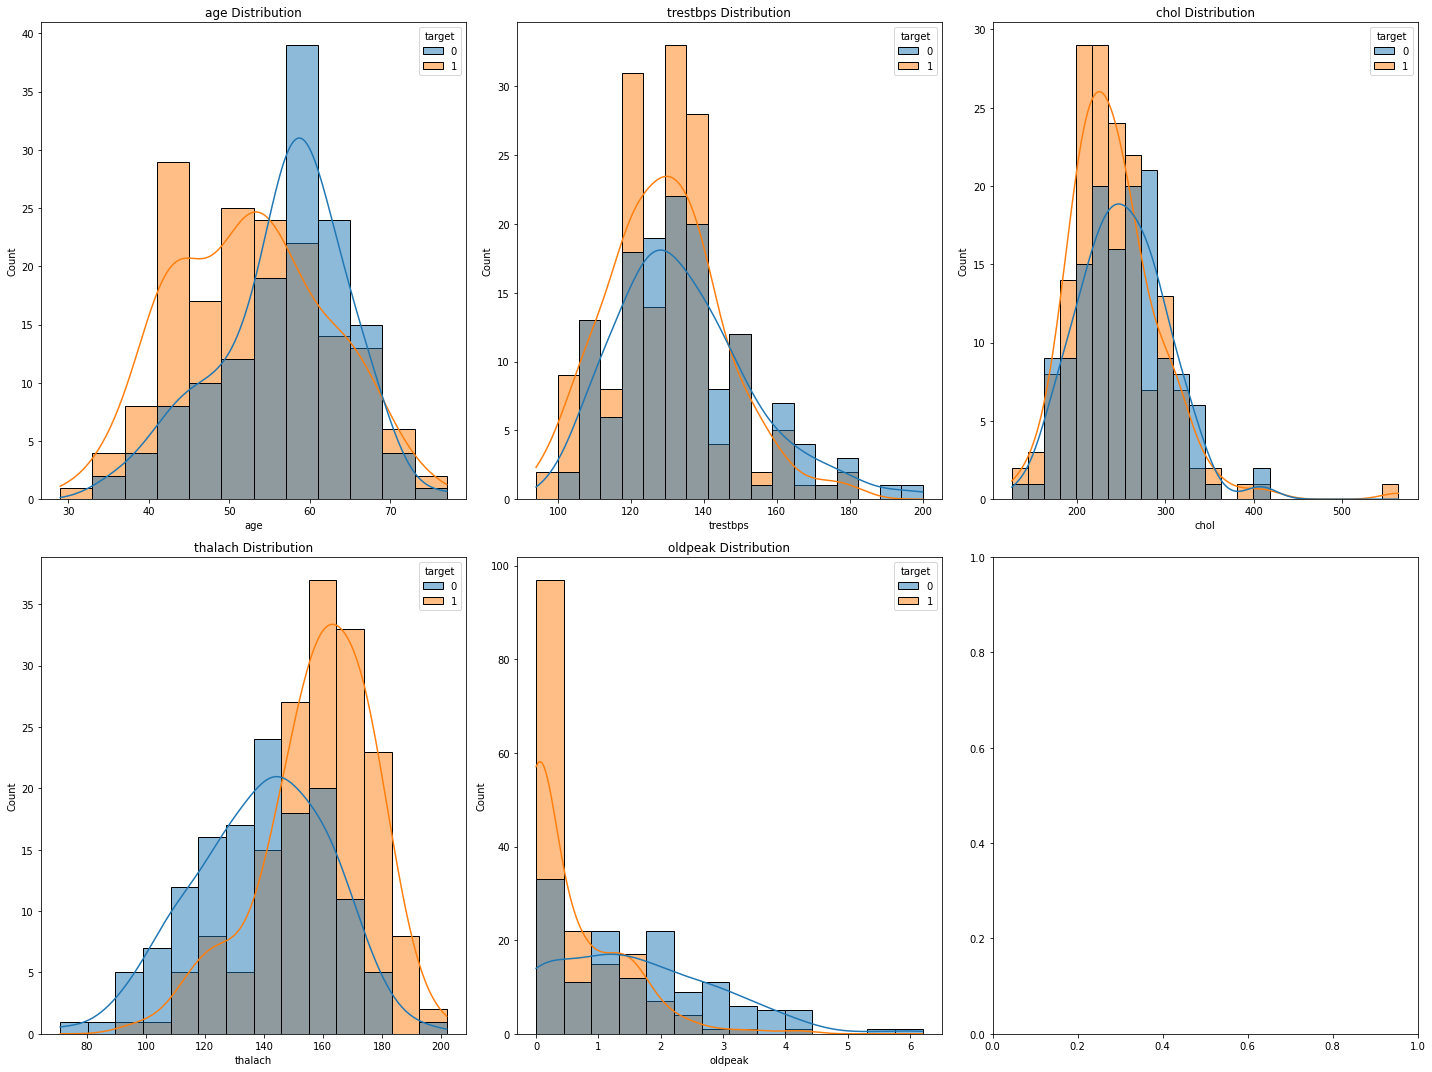

In [14]:
fig, axes = plt.subplots(2, 3, figsize=(20, 15),)
axes = axes.flatten()
#fig.suptitle('Distribution of Numerical Features', fontsize=16)

for ax, col in zip(axes, continuous):
    sns.histplot(data=heart, x=heart[col], kde=True, ax=ax, hue='target' )
    ax.set_title(f'{col} Distribution')

plt.tight_layout()  
plt.show()

Visualising distribution of continuous variables

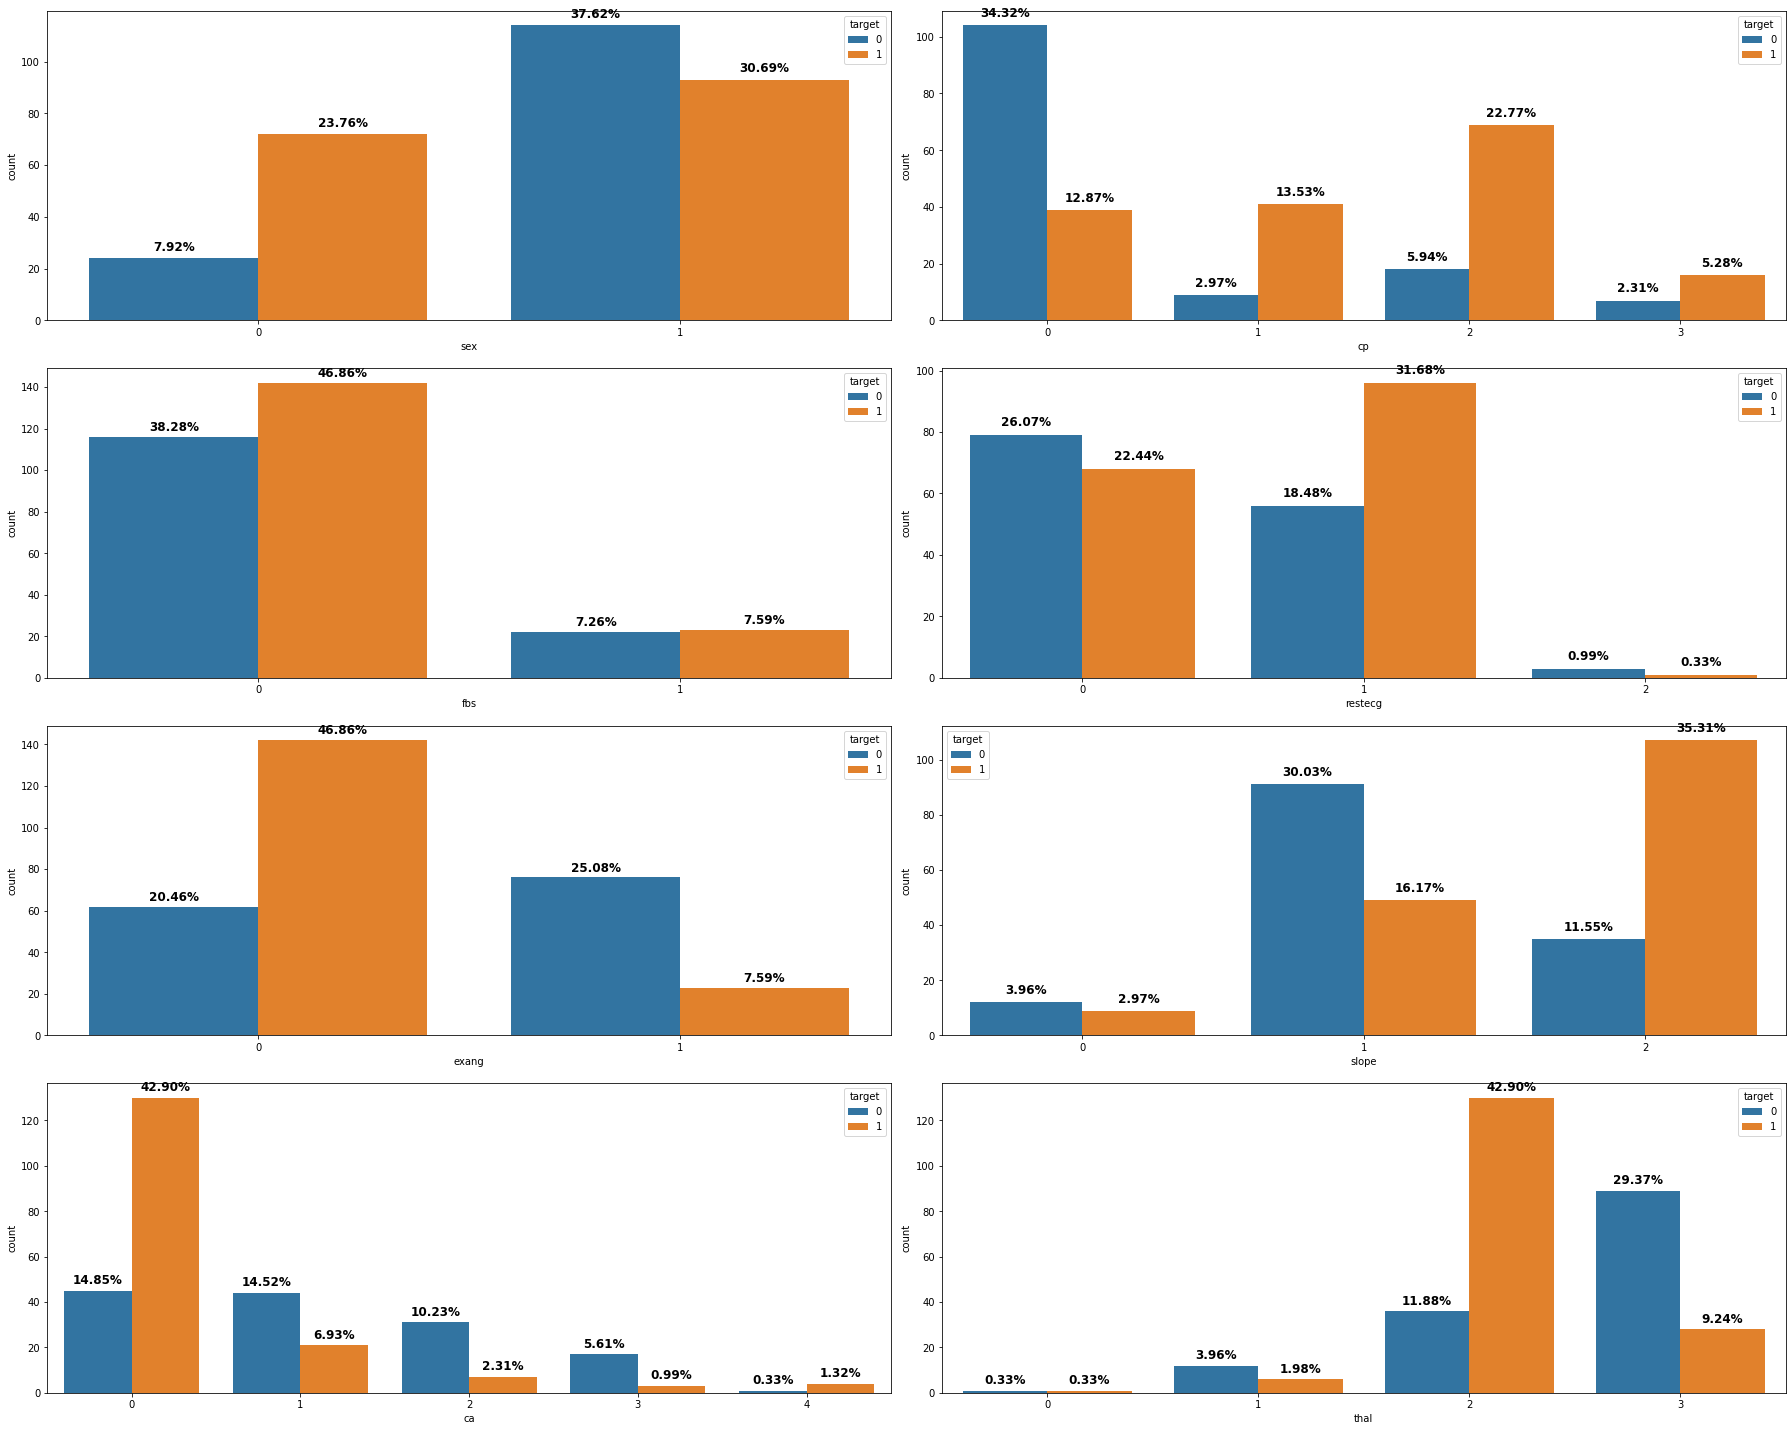

In [15]:
fig, axes =plt.subplots(4, 2, figsize=(25, 20),)
axes = axes.flatten()
#fig.suptitle('Distribution Features Agains the Target Variable(Charges)', fontsize=16)

for ax, col in zip(axes, discrete[:-1]):
   sns.countplot(data=heart, x=col,  hue='target', ax=ax)

   for p in ax.patches:
       total = float(len(heart))
       height = p.get_height()
       ax.text(p.get_x()+p.get_width()/2.,height + 3, '{:.2f}%'.format((height/total)*100),fontsize=12, weight = 'bold',ha="center") 

plt.tight_layout()  
plt.show()

**Multivariate Analysis**

---



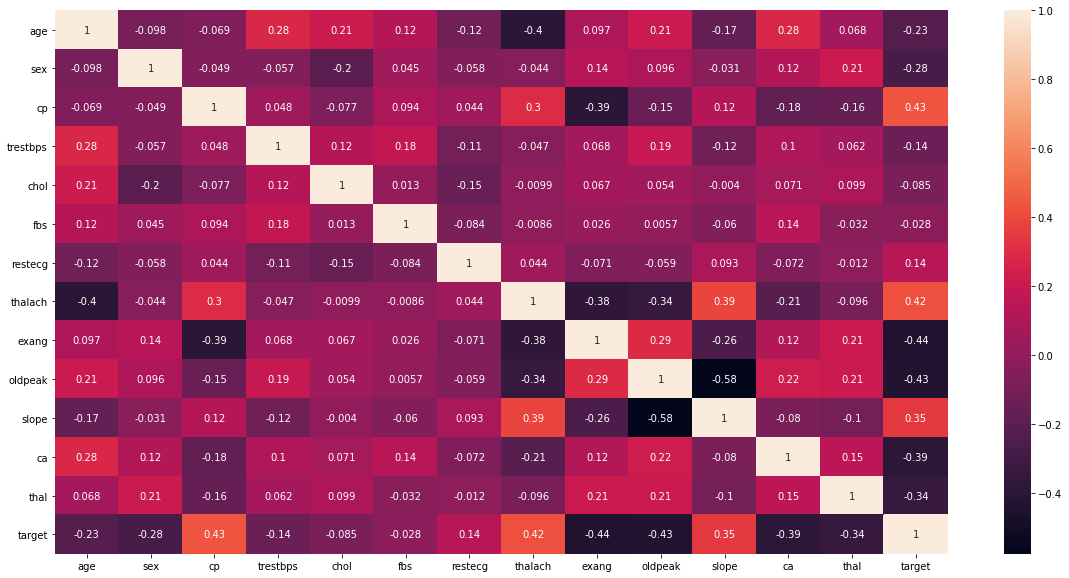

In [16]:
plt.figure(figsize=(20, 10))
sns.heatmap(heart.corr(), annot=True)

# 9.3: Identify any presence of outliers in the continuous features and resolve them using the IQR method.

In [17]:
for col in continuous:
    fig = px.box(heart, y=heart[col], title=f'{col} Box Plot Distribution', color_discrete_sequence=['indianred'], template='plotly_dark' )
    fig.show(renderer='colab')

In [18]:
heart_clean = heart.copy()

def iqr_outlier_remover(df): 
    q1 = df.quantile(0.25) 
    q3 = df.quantile(0.75) 
    iqr = q3 - q1
    
    clean_df = df[ ~ ((df < (q1 - 1.5 * iqr)) | (df > (q3 + 1.5 * iqr)))]
    return clean_df

In [19]:
heart_clean[continuous] = iqr_outlier_remover(heart_clean[continuous])
heart_clean.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145.0,233.0,1,0,150.0,0,2.3,0,0,1,1
1,37,1,2,130.0,250.0,0,1,187.0,0,3.5,0,0,2,1
2,41,0,1,130.0,204.0,0,0,172.0,0,1.4,2,0,2,1
3,56,1,1,120.0,236.0,0,1,178.0,0,0.8,2,0,2,1
4,57,0,0,120.0,354.0,0,1,163.0,1,0.6,2,0,2,1


In [20]:
for col in continuous:
    fig = px.box(heart_clean, y=heart_clean[col], title=f'{col} Box Plot Distribution After Outlier Removal ', 
                 color_discrete_sequence=['gold'], template='plotly_dark' )
    fig.show(renderer='colab')

In [21]:
heart_clean.isnull().sum()

age         0
sex         0
cp          0
trestbps    9
chol        5
fbs         0
restecg     0
thalach     1
exang       0
oldpeak     5
slope       0
ca          0
thal        0
target      0
dtype: int64

In [22]:
heart_clean.fillna(heart_clean.median(), inplace=True)
heart_clean.isnull().any()

age         False
sex         False
cp          False
trestbps    False
chol        False
fbs         False
restecg     False
thalach     False
exang       False
oldpeak     False
slope       False
ca          False
thal        False
target      False
dtype: bool

# 9.4: Bin the continuous column values apart from the column ‘oldpeak’.




In [23]:
for col in continuous[:-1]:
    #heart_clean[f'{col}_binned'] = pd.qcut(heart_clean[col], q=[0, .25, .50, .75, 1])
    #heart_clean.drop(columns=col, inplace=True)
    heart_clean[col] = pd.qcut(heart_clean[col], q=[0, .25, .50, .75, 1])

heart_clean.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,"(61.0, 77.0]",1,3,"(140.0, 170.0]","(211.0, 240.0]",1,0,"(135.0, 153.0]",0,2.3,0,0,1,1
1,"(28.999, 47.5]",1,2,"(120.0, 130.0]","(240.0, 272.0]",0,1,"(166.0, 202.0]",0,3.5,0,0,2,1
2,"(28.999, 47.5]",0,1,"(120.0, 130.0]","(125.999, 211.0]",0,0,"(166.0, 202.0]",0,1.4,2,0,2,1
3,"(55.0, 61.0]",1,1,"(93.999, 120.0]","(211.0, 240.0]",0,1,"(166.0, 202.0]",0,0.8,2,0,2,1
4,"(55.0, 61.0]",0,0,"(93.999, 120.0]","(272.0, 360.0]",0,1,"(153.0, 166.0]",1,0.6,2,0,2,1


In [24]:
le = LabelEncoder( )

for col in continuous[:-1]:
    heart_clean[col] = le.fit_transform(heart_clean[col].astype(str))
    print(f'{col} \n {np.unique(heart_clean[col])}')

display(heart_clean.head())

age 
 [0 1 2 3]
trestbps 
 [0 1 2 3]
chol 
 [0 1 2 3]
thalach 
 [0 1 2 3]


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,3,1,3,2,1,1,0,0,0,2.3,0,0,1,1
1,0,1,2,0,2,0,1,2,0,3.5,0,0,2,1
2,0,0,1,0,0,0,0,2,0,1.4,2,0,2,1
3,2,1,1,3,1,0,1,2,0,0.8,2,0,2,1
4,2,0,0,3,3,0,1,1,1,0.6,2,0,2,1


#9.5: Separate the features from the labels and use the most appropriate feature selection technique(s).

In [25]:
X = heart_clean.drop(columns='target')
y = heart_clean['target']
display(X.head(3), y.head(3))

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,3,1,3,2,1,1,0,0,0,2.3,0,0,1
1,0,1,2,0,2,0,1,2,0,3.5,0,0,2
2,0,0,1,0,0,0,0,2,0,1.4,2,0,2


0    1
1    1
2    1
Name: target, dtype: int64

In [26]:
model = XGBClassifier()
model.fit(X, y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
'''for col, score in zip(X.columns, model.feature_importances_):
    print(col, score)'''

In [27]:
sorted_idx = model.feature_importances_.argsort()

fig = px.bar(y= X.columns[sorted_idx], x=model.feature_importances_[sorted_idx], template='plotly_dark', orientation='h', 
             color=X.columns, color_discrete_sequence=px.colors.sequential.RdBu, title='Xgboost Feature Importance by F Score')
fig.update_layout(xaxis_title='F Score', yaxis_title=f'Features',)
             
fig.show(renderer='colab')

In [28]:
figure = px.pie(names=X.columns, values=model.feature_importances_, color=X.columns, color_discrete_sequence=px.colors.sequential.RdBu,
                title='XGBClassifier F Score Weights', template='plotly_dark')    
figure.show(renderer='colab')

In [29]:
pca = PCA(.95)
x_pca = pca.fit_transform(X)

display(pca.n_components_)
display(pca.explained_variance_ratio_)

10

array([0.20086579, 0.1503786 , 0.12889896, 0.11419932, 0.10437992,
       0.09308627, 0.07555799, 0.0355727 , 0.0271146 , 0.02478927])

#9.6: Slice the data and scale the features.

In [30]:
X_train, X_test, y_train, y_test = train_test_split(x_pca, y, test_size=0.2, random_state=42)

print(f'X_train dataset:{X_train.shape}')
print(f'y_train dataset: {y_train.shape}')
print(f'X_test dataset: {X_test.shape}')
print(f'y_test dataset: {y_test.shape}')

X_train dataset:(242, 10)
y_train dataset: (242,)
X_test dataset: (61, 10)
y_test dataset: (61,)


In [31]:
scaler = RobustScaler()
Xtrain_scaled = scaler.fit_transform(X_train)
Xtest_scaled = scaler.transform(X_test)

#9.7: Identify the data if the data is balanced. If not, sample the data using the most appropriate method keeping the size of the data in mind.

In [32]:
oversampler = SMOTE()
Xtrain_os, ytrain_os = oversampler.fit_resample(Xtrain_scaled, y_train)

#9.8: Using at least 4 classification methods, identify the best machine learning model using their training and testing accuracy scores.

In [33]:
def val_model(X, y, classifier, quiet=False):
    """
    Cross-validates for a given model

    # Arguments
      X: DataFrame, feature matrix
      y: Series, target vector
      classifier: classifier from scikit-learn
      quiet: Boolean, indicates if function should print the results

    # Returns
      Float, validation scores
  """

    X = np.array(X)
    y = np.array(y)

    #pipe = make_pipeline(StandardScaler(), classifier)
    kfold = KFold(n_splits=5, shuffle=True, random_state=42)
    scores = cross_val_score(classifier, X, y, cv=kfold, scoring='accuracy')

    if quiet == False:
        print(f"##### {classifier.__class__.__name__} #####")
        print(f'Scores: {scores}')
        print(f'recall: {scores.mean()} (+/- {scores.std()})')

    return scores.mean()

In [34]:
def getClfAccuracyScores(X_train, y_train, *clf_list):
    """
     Provides recall score for a given list of models
    
    # Arguments
     X_train: X_train
     y_train: y_train
     *clf_list: list of classifiers

    # Returns
     DataFrame, accuracy scores

  """

    model = []
    accuracy = []

    for clf in clf_list:
        model.append(clf.__class__.__name__)
        accuracy.append(val_model(X_train, y_train, clf))

    return pd.DataFrame(data=accuracy, index=model, columns=['Accuracy']).sort_values(by='Accuracy', ascending=False)

In [39]:
dt = DecisionTreeClassifier()
lr = LogisticRegression()
sv = SVC()
rf = RandomForestClassifier()
knn = KNeighborsClassifier()
grad = GradientBoostingClassifier()
extra = ExtraTreesClassifier()
nb = GaussianNB()
xgb = XGBClassifier()
ada = AdaBoostClassifier()

classifiers = [dt, lr, sv, rf, knn, grad, extra, nb, xgb, ada]

In [40]:
df_scores = getClfAccuracyScores(Xtrain_os, ytrain_os, *classifiers)
print(df_scores)

##### DecisionTreeClassifier #####
Scores: [0.7962963  0.66037736 0.73584906 0.81132075 0.67924528]
recall: 0.736617749825297 (+/- 0.06041002558571675)
##### LogisticRegression #####
Scores: [0.7962963  0.79245283 0.81132075 0.79245283 0.86792453]
recall: 0.8120894479385047 (+/- 0.02877069425840629)
##### SVC #####
Scores: [0.81481481 0.71698113 0.83018868 0.77358491 0.90566038]
recall: 0.8082459818308875 (+/- 0.06252177059996827)
##### RandomForestClassifier #####
Scores: [0.85185185 0.71698113 0.83018868 0.8490566  0.8490566 ]
recall: 0.8194269741439554 (+/- 0.05180379803095279)
##### KNeighborsClassifier #####
Scores: [0.7962963  0.67924528 0.79245283 0.83018868 0.88679245]
recall: 0.796995108315863 (+/- 0.06789921681310793)
##### GradientBoostingClassifier #####
Scores: [0.83333333 0.75471698 0.88679245 0.8490566  0.77358491]
recall: 0.819496855345912 (+/- 0.04878168409978695)
##### ExtraTreesClassifier #####
Scores: [0.83333333 0.75471698 0.8490566  0.83018868 0.88679245]
recall: 

#9.9: Hyper parameter tune the best model using grid search to identify the best performing model.

In [ ]:
'''def gridsearch_maker(model, params):
    '''Takes in a pipeline and param grid, returns GridSearchCV object'''

    cv = KFold(n-splits=5, shuffle=True, random_state=True)
    return GridSearchCV(estimator=model, param_grid=params, scoring='recall', cv=cv, n_jobs=-1)

def find_best_recall(gridsearch):
    """ 
    Runs a grid search iterating through predefined grid params and returns best params to optimize recall score. 

    Fits classifier to X_train and y_train.
    Determines and prints best params for recall.
    Determines and prints best training set recall.
    Predicts on test data using best params.
    Prints best test set recall.
    Prints classification report for best model.
    Plots confusion matrix for best model.
  
    Parameters: 
    gridsearch: Predefined instance of GridsearchCV with parameters and estimator/pipeline already set.
  
    Returns: 
    Best parameters for particular grid search, based on recall score.
    Best training set recall.
    Best test set recall.
    Classification report for best model.
    Confusion matrix for best model.
    """

    best_recall = 0.0

    gridsearch.fit(X_train, y_train)
    print(f'Best params:{gridsearch.best_params_}')
    print(f'Best training recall:{gridsearch.best_score_}')
  
    y_pred = gridsearch.predict(X_test)
    print(f'Test set recall score for best params:{recall_score(y_test, y_pred)}')
    
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print(f'Recall score: {recall_score(y_test, y_pred)}')
    
    plot_confusion_matrix(gridsearch, X_test, y_test,cmap="RdPu")
    plt.show()

In [41]:
params =  {'n_estimators': [100, 200, 500], 
           'criterion' : ['gini', 'entropy'], 
           'max_depth': [1, 3, 5, 7, 10], 
           'max_features': ['sqrt','log2'],
           'min_samples_split': [2, 4, 6, 8, 10],
           }

extra = ExtraTreesClassifier(random_state=42, bootstrap=True, )
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid = GridSearchCV(extra, params, cv=cv,)
results = grid.fit(Xtrain_os, ytrain_os)

print(f'Best Accuracy Score: {results.best_score_}')
print(f'Best Parameters: {results.best_params_}')

Best Accuracy Score: 0.8611460517120895
Best Parameters: {'criterion': 'entropy', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 500}


#9.10: Redefine the model instance based on the grid search results, train it.

In [42]:
et_model = results.best_estimator_
et_model.fit(Xtrain_os, ytrain_os)

y_pred = et_model.predict(Xtest_scaled)

#9.10 Evaluate it using: 
# a) A classification report.


In [43]:
from termcolor import colored as cl # text customization
print(cl(classification_report(y_test, y_pred), attrs=['bold']))

              precision    recall  f1-score   support

           0       0.89      0.83      0.86        29
           1       0.85      0.91      0.88        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



# b) A visual representation and well labelled confusion matrix.

In [44]:
cm = pd.DataFrame(confusion_matrix(y_test, y_pred, labels=[1, 0]))
display(cm)

,0,1
0,29,3
1,5,24


In [45]:
z_text = [[str(y) for y in x] for x in cm.values]

x = ['0', '1']
y = ['0', '1']

fig = ff.create_annotated_heatmap(cm.values, x=x, y=y, annotation_text=z_text, colorscale='Reds')
fig.add_annotation(dict(font=dict(color="white",size=18), x=0.5, y=-0.15, showarrow=False, text="Predicted values",
                        xref="paper", yref="paper"))
fig.add_annotation(dict(font=dict(color="white",size=18), x=-0.15, y=0.5, showarrow=False, text="Actual values",
                        textangle=-90, xref="paper", yref="paper"))
fig.update_layout(margin=dict(t=50, l=200), title='Confusion Matrix', template='plotly_dark')

# add colorbar
fig['data'][0]['showscale'] = True
fig.show(renderer='colab')

# c) AUC score. (Explain the score in a markdown cell.)

In [57]:
y_pred_proba = et_model.predict_proba(Xtest_scaled)[:, 1]
auc = roc_auc_score(y_test, y_pred_proba)

print(f'AUC: {auc}')

AUC: 0.9267241379310345


- AUC(Area under the ROC Curve) measures the entire 2d area under the ROC curve from (0,0) to (1,1).
- Provides an aggregate measure of performance across all possible classification thresholds i.e tells how much the model is capable of distinguishing between classes. 
- The higher the AUC, the better the model is at predicting 0s as 0s and 1s as 1s.
- Can be interpreted as the probability that the model ranks a random positive sample more highly than a random negative sample.
- Ranges in value from 0 to 1 i.e a model whose predictions are 100% wrong has an AUC of 0.0; one whose predictions are 100% correct has an AUC of 1.0. 
- That said, this implies that this particular model made slightly more than 92% correct predictions.

#d): ROC Curve

In [83]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_df = pd.DataFrame(zip(fpr, tpr, thresholds), columns = ["False Positive Rate","True Positive Rate","Threshold"])
roc_df.head()

,False Positive Rate,True Positive Rate,Threshold
0,0.000000,0.00000,1.924827
1,0.000000,0.03125,0.924827
2,0.000000,0.40625,0.716810
3,0.034483,0.40625,0.716083
4,0.034483,0.59375,0.673007


In [77]:
fig = px.area(roc_df, x='False Positive Rate', y='True Positive Rate', hover_data=['Threshold'], 
              title=f'ROC Curve (AUC={auc})', template='plotly_dark')

fig.add_annotation(x=0.6, y=0.4, text=f'AUC={auc}', showarrow=False)
fig.add_shape(type='line', line=dict(dash='dash', color='black'), x0=0, x1=1, y0=0, y1=1,)

fig.show(renderer='colab')

#9.12: Save the model as 'classification_model'.

In [71]:
joblib.dump(et_model, 'classification_model.sav')

['classification_model.sav']